In [3]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

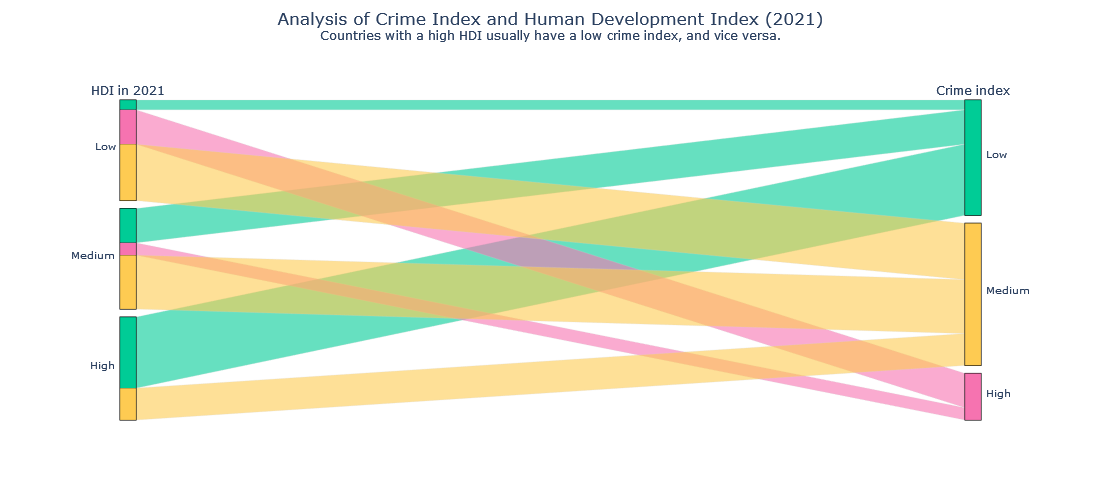

In [7]:
df_development = pd.read_csv('datasets/Human Development Index.csv')
df_world = pd.read_csv('datasets/crime-rate-by-country-2023.csv')

color_map = {'Low': '#00cc96', 'Medium': '#fecb52', 'High': '#f673b0'}

# Filter and rename columns
df_development_filtered = df_development[['Country', 'HDI Rank (2021)', 'Human Development Index (2021)', 'Inequality in income (2021)']]
df_development_filtered = df_development_filtered.rename(columns={'Country': 'country'})

# Merge dataframes
hdi_df = df_development_filtered[['country', 'Human Development Index (2021)']]
merged_hdi_df = pd.merge(df_world, hdi_df, on='country', how='inner')

# Define bins and labels for crimeIndex and Human Development Index (2021)
bins_crime = [-float('inf'), 40, 60, float('inf')]
labels_crime = ['Low', 'Medium', 'High']
bins_hdi = [merged_hdi_df['Human Development Index (2021)'].min(), 
            merged_hdi_df['Human Development Index (2021)'].quantile(1/3), 
            merged_hdi_df['Human Development Index (2021)'].quantile(2/3), 
            merged_hdi_df['Human Development Index (2021)'].max()]
labels_hdi = ['Low', 'Medium', 'High']

# Apply binning
merged_hdi_df['crimeIndex'], bins_cut_crime = pd.cut(merged_hdi_df['crimeIndex'], bins=bins_crime, labels=labels_crime, retbins=True)
merged_hdi_df['Human Development Index (2021)'], bins_cut_hdi = pd.cut(merged_hdi_df['Human Development Index (2021)'], bins=bins_hdi, labels=labels_hdi, retbins=True)

# Drop NaN values if any
merged_hdi_df = merged_hdi_df.dropna(subset=['crimeIndex', 'Human Development Index (2021)'])

# Create parallel categories plot
parcat = go.Parcats(dimensions=[
                    {'label': 'HDI in 2021', 'values': merged_hdi_df['Human Development Index (2021)'], 'categoryorder': 'array', 'categoryarray': ['Low', 'Medium', 'High']},
                    {'label': 'Crime index', 'values': merged_hdi_df['crimeIndex'], 'categoryorder': 'array', 'categoryarray': ['Low', 'Medium', 'High']}
                    ],
                    line=dict(color=merged_hdi_df['crimeIndex'].map(color_map)))

gdi_figure = go.Figure(parcat)
gdi_figure.update_layout(
    title={
    'text': 'Analysis of Crime Index and Human Development Index (2021)<br><sup>Countries with a high HDI usually have a low crime index, and vice versa.</sup>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 500)
gdi_figure.show()